# Dimensionality Reduction using an Autoencoder in Python 
Welcome to this project. We will introduce the theory behind an autoencoder (AE), its uses, and its advantages over PCA, a common dimensionality reduction technique.

## Some Prerequisites
- Basic-to-intermediate level understanding of Python
- Basic theory of neural networks is beneficial, but not required

## Project Outline
[**Task 1**](#task1): Package Importing and Introduction to Project

[**Task 2**](#task2): Dataset Creation and Preprocessing

[**Task 3**](#task3): Create a Baseline Model with PCA

[**Task 4**](#task4): Autoencoder Introduction and Training

[**Task 5**](#task5): Reducing Dimensionality with AE




## Talking points
- Intro
- Rhyme layout
- Emailed final file
- Imports

<a id='task1'></a>
# Task 1: Importing and Introduction

In [1]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [3]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

<a id='task2'></a>
# Task 2: Dataset Creation and Preprocessing

In [4]:
X, y = make_blobs(n_features=50, centers=20, n_samples=20000, cluster_std=0.2, 
                  random_state=17, center_box=[-1, 1])

In [5]:
X.shape

(20000, 50)

In [6]:
y.shape

(20000,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=17)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id='task3'></a>
# Task 3: Baseline Model

Text(0.5, 1.0, 'PCA Results')

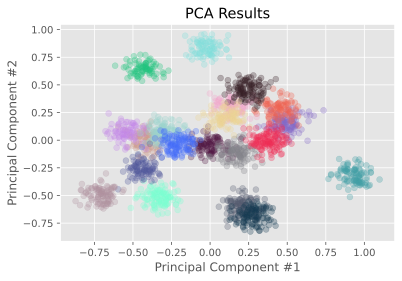

In [8]:
pca = PCA(n_components=2)
pca.fit(X_train)

res_pca = pca.transform(X_test)

unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    X_data = res_pca[y_test==unique_label]
    plt.scatter(X_data[:,0], X_data[:,1], alpha=0.3, c=cols[index])
    
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')
plt.title('PCA Results')

# Task 4: Autoencoder Theory and Training
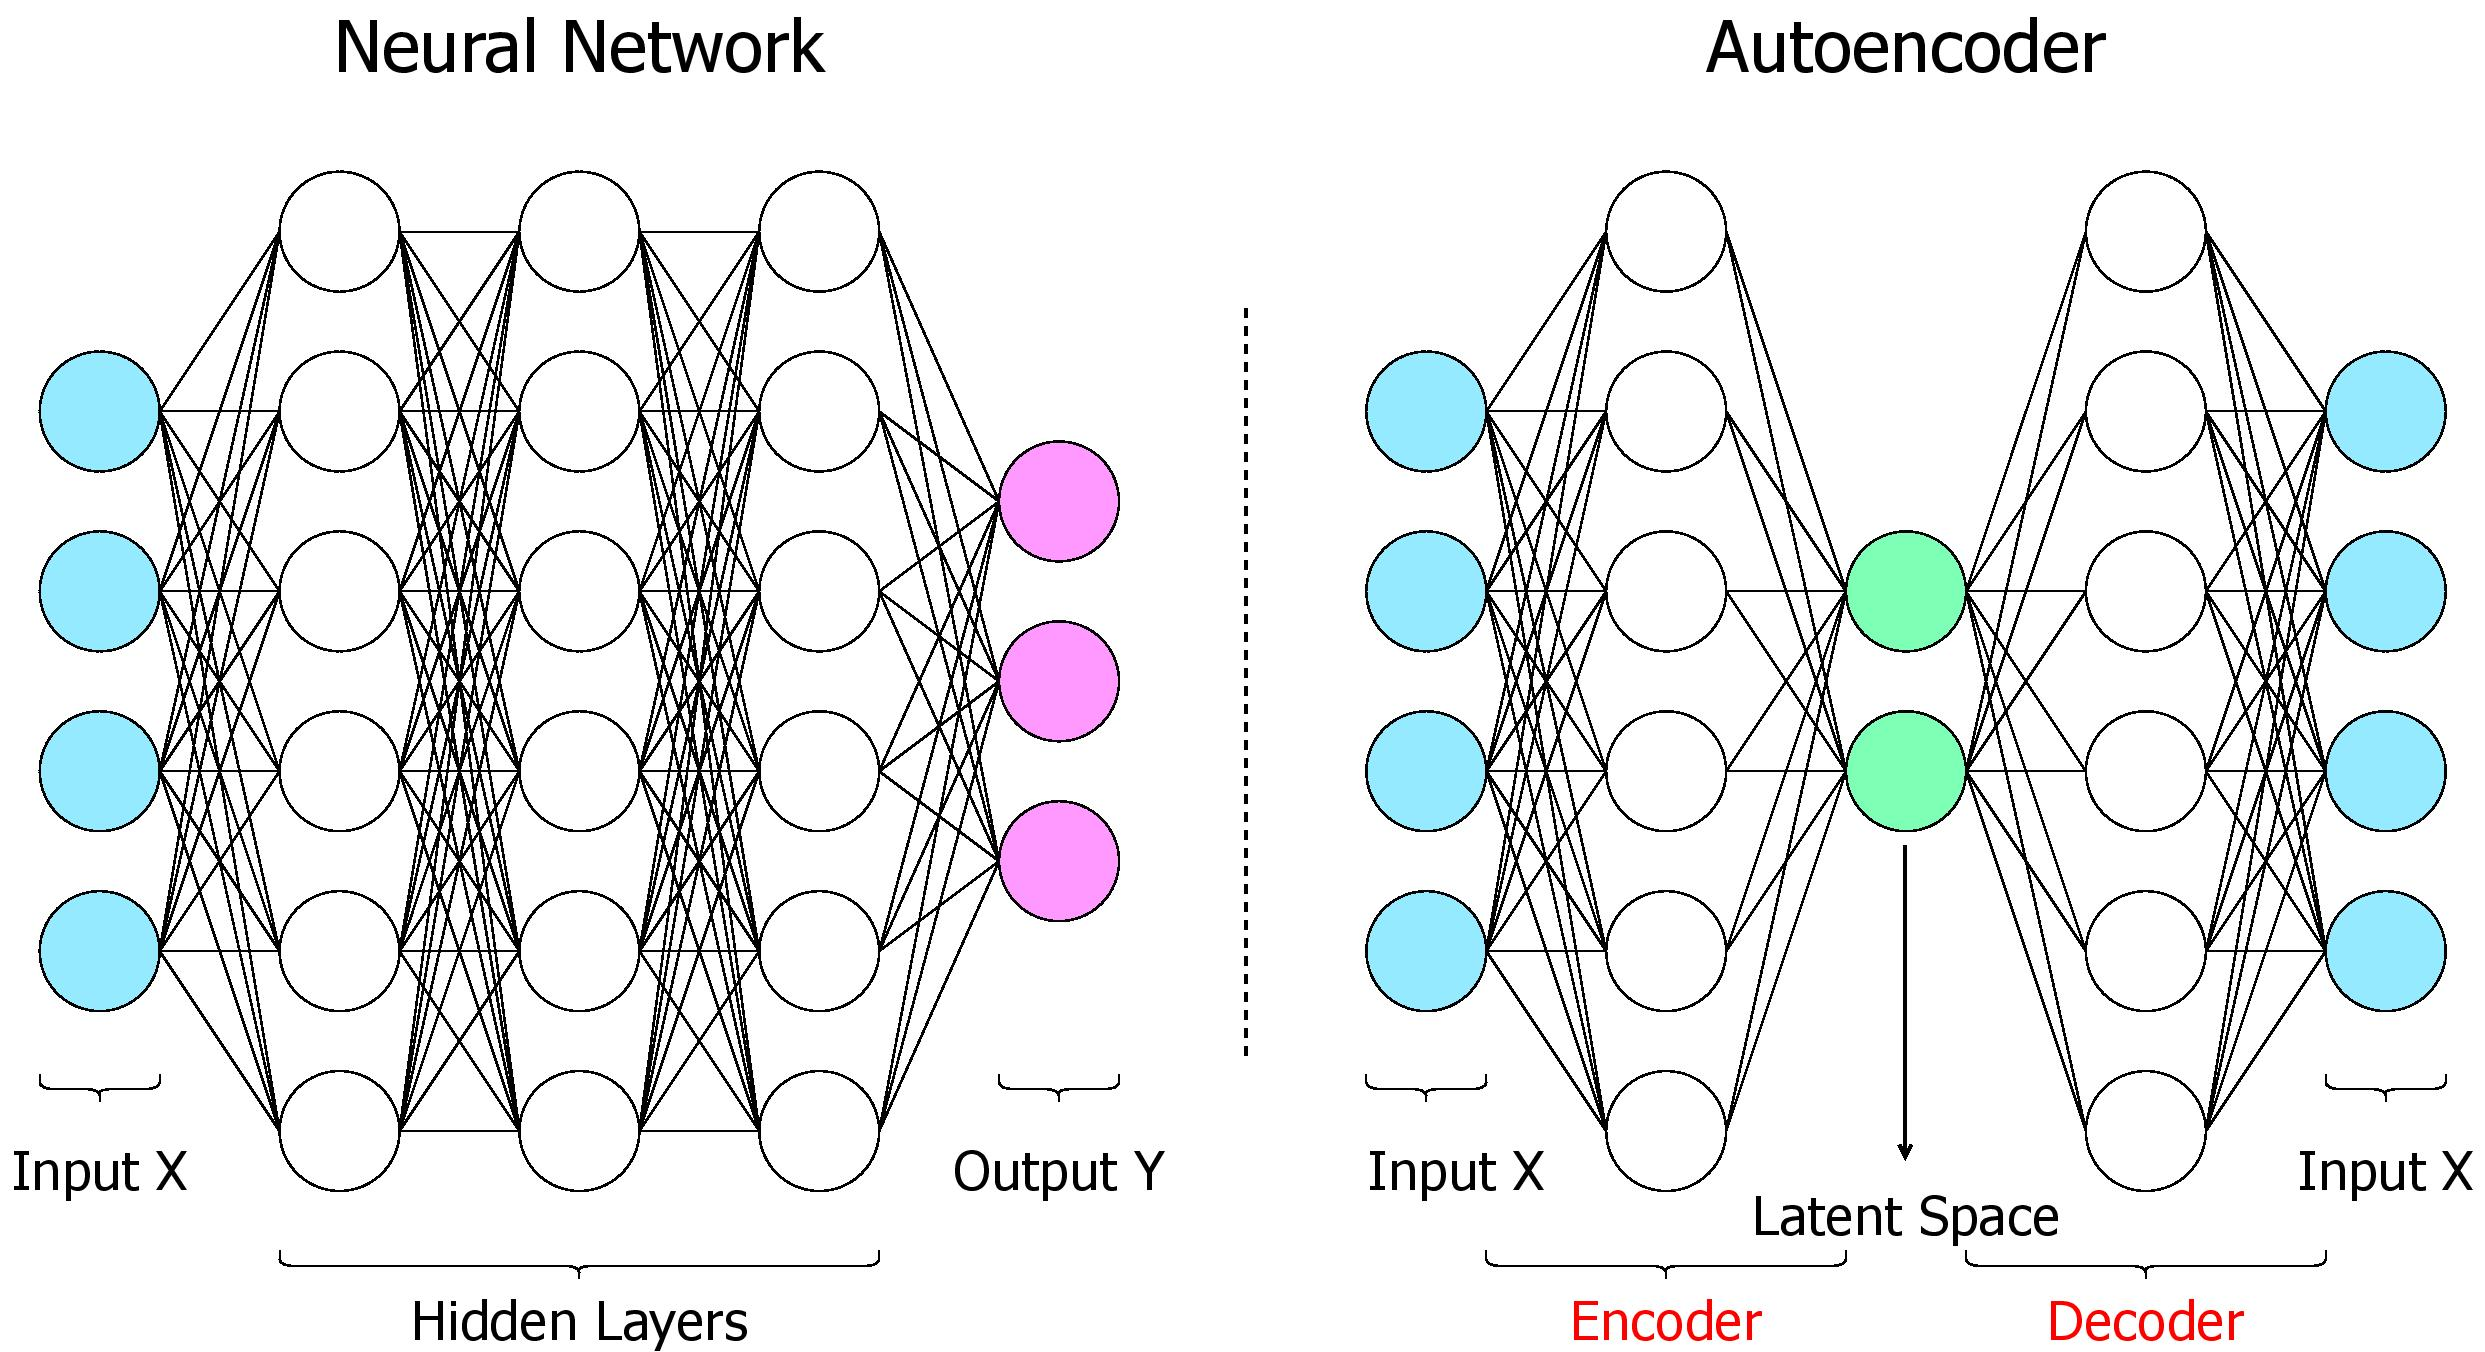

In [9]:
autoencoder = MLPRegressor(
    alpha=1e-15, 
    hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50), 
    random_state=1, 
    max_iter=20000
)

autoencoder.fit(X_train, X_train)

MLPRegressor(alpha=1e-15, hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             max_iter=20000, random_state=1)

<a id='task5'></a>
# Task 5: Reducing Dimensionality with Encoder

In [10]:
W = autoencoder.coefs_
biases = autoencoder.intercepts_

In [11]:
W

[array([[ 0.06529256,  0.10926582, -0.30909742, ..., -0.06262987,
         -0.12189874, -0.11745607],
        [-0.10223618,  0.14852028, -0.20114138, ...,  0.08826299,
         -0.14241023, -0.16929775],
        [-0.0660378 ,  0.05186522,  0.0607234 , ...,  0.16561193,
         -0.00945891, -0.32842994],
        ...,
        [-0.11441964,  0.10808088, -0.15703906, ..., -0.17790831,
         -0.13128285,  0.05701157],
        [ 0.15302111, -0.09239105, -0.08226052, ..., -0.20974689,
         -0.03562906,  0.08822469],
        [-0.00038186,  0.19918715,  0.09064672, ...,  0.06890028,
         -0.07555277, -0.09123235]]),
 array([[ 3.67433383e-01, -1.98382420e-01, -9.04327625e-02, ...,
          5.03220224e-02,  1.16010460e-01, -1.45970595e-01],
        [ 7.00058927e-02,  2.39853163e-02, -1.38112036e-01, ...,
          1.16423322e-01, -1.83992885e-01, -7.71752985e-02],
        [-5.40053906e-02,  1.57290457e-01,  5.98097326e-02, ...,
          2.28870053e-01, -1.97064043e-01,  9.48404032e-

In [12]:
biases

[array([ 0.28957492,  0.07667978,  0.09339062, -0.01844879,  0.11658966,
        -0.00182343, -0.1869197 , -0.09145603, -0.03266827, -0.1823294 ,
        -0.00909199, -0.17179686,  0.23353919, -0.09168652, -0.13384535,
        -0.04498174,  0.07374477, -0.21121665, -0.1209907 ,  0.13974863,
         0.13087834,  0.03910184,  0.23695355, -0.1685919 ,  0.15447911,
         0.22553745, -0.17110192, -0.1255295 ,  0.07869512, -0.02408811,
         0.06929567, -0.16359502, -0.13492863,  0.19637834,  0.25156941,
         0.26736239,  0.22782983, -0.19875983, -0.1734587 , -0.20761034,
         0.04100041,  0.23595005,  0.01557479,  0.10679967, -0.10063603,
         0.25351744, -0.18842362, -0.20800121, -0.0225565 ,  0.04684794]),
 array([ 0.0293011 ,  0.04138978,  0.07485711,  0.02581427, -0.01643313,
        -0.13140469,  0.07998321, -0.05055234, -0.01231398, -0.12840687,
        -0.07857171,  0.05006029,  0.22470371,  0.04365002,  0.06316511,
        -0.04608473, -0.13352217, -0.02096855,  0

In [19]:
for w in W:
    print(w.shape)

(50, 50)
(50, 100)
(100, 50)
(50, 2)
(2, 50)
(50, 100)
(100, 50)
(50, 50)


In [13]:
encoder_weights = W[0:4]
encoder_biases = biases[0:4]

In [14]:
def encoder(encoder_weights, encoder_biases, data):
    res_ae = data
    for index, (w, b) in enumerate(zip(encoder_weights, encoder_biases)):
        if index+1 == len(encoder_weights):
            res_ae = res_ae@w+b 
        else:
            res_ae = np.maximum(0, res_ae@w+b)
    return res_ae
            
res_ae = encoder(encoder_weights, encoder_biases, X_test)

Text(0.5, 1.0, 'Autoencoder Results')

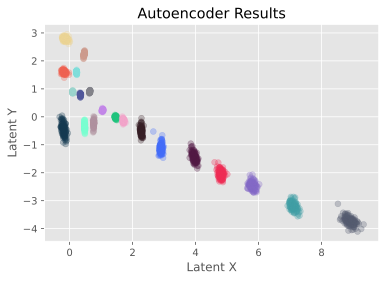

In [15]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    latent_space = res_ae[y_test==unique_label]
    plt.scatter(latent_space[:,0], latent_space[:,1], alpha=0.3, c=cols[index])

plt.xlabel('Latent X')
plt.ylabel('Latent Y')
plt.title('Autoencoder Results')

In [16]:
silhouette_score(X_train, y_train)

0.6109772034818249

In [17]:
silhouette_score(res_pca, y_test)

0.36788650429023995

In [18]:
silhouette_score(res_ae, y_test)

0.8074659601956312